In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale=1.5)

# feature names
time = 'Runtime (s)'
memory = 'Max memory (kb)'

# read and show data
#results = pd.read_csv('../results/2019-07-03_10-35-02_laptop_1x1000.csv')
results = pd.read_csv('../results/2019-07-04_12-19-45_tango4_30x100.csv')
results.head()

,Runtime (s),Max memory (kb)
0,0.34,37080
1,0.37,37024
2,0.38,37060
3,0.38,37024
4,0.39,36984


In [18]:
# convert memory kb to mb
results['Max memory (mb)'] = results[memory] / 1024

# drop old, kb column
results = results.drop(memory, axis=1)
memory = 'Max memory (mb)'

results.head()

,Runtime (s),Max memory (mb)
0,0.34,36.210938
1,0.37,36.156250
2,0.38,36.191406
3,0.38,36.156250
4,0.39,36.117188


In [19]:
# add num vnfs column

# for 1x1000 results
#results['VNFs'] = [i for i in range(results.shape[0])]

# for 30x100 results
results['VNFs'] = [i for j in range(30) for i in range(1,101)]

results.tail()

,Runtime (s),Max memory (mb),VNFs
2995,4.24,37.394531,96
2996,4.25,37.128906,97
2997,4.30,37.582031,98
2998,4.45,37.597656,99
2999,4.45,37.601562,100


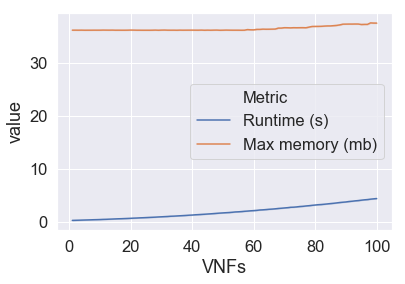

In [20]:
# transform into long format and plot
results_long = pd.melt(results, ['VNFs'], var_name='Metric')
sns.lineplot(x='VNFs', y='value', hue='Metric', data=results_long)

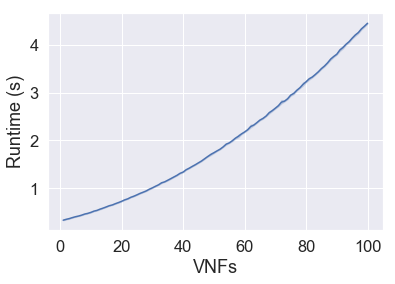

In [21]:
# plot runtime
plot = sns.lineplot(x='VNFs', y=time, data=results)
plot.get_figure().savefig('runtime_line.png', bbox_inches='tight', dpi=400)

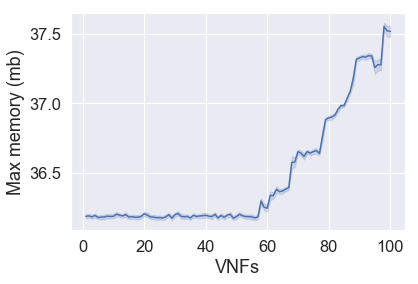

In [22]:
# plot memory
plot = sns.lineplot(x='VNFs', y=memory, data=results)
plot.get_figure().savefig('memory_line.png', bbox_inches='tight', dpi=400)

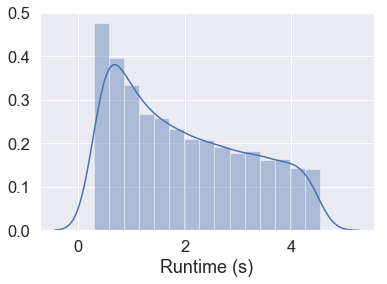

In [23]:
plot = sns.distplot(results[time])
plot.get_figure().savefig('runtime_dist.png', bbox_inches='tight', dpi=400)

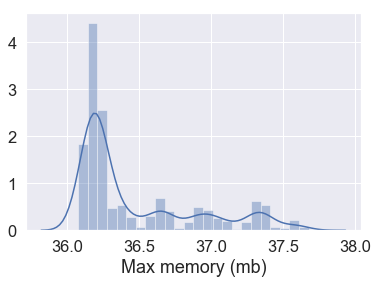

In [24]:
plot = sns.distplot(results[memory])
plot.get_figure().savefig('memory_dist.png', bbox_inches='tight', dpi=400)

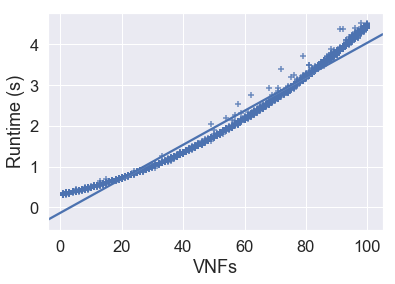

In [25]:
plot = sns.regplot(x='VNFs', y=time, data=results, marker='+')
plot.get_figure().savefig('runtime_reg.png', bbox_inches='tight', dpi=400)

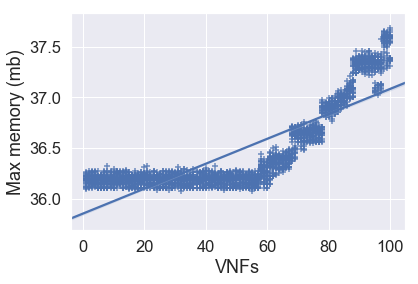

In [26]:
plot = sns.regplot(x='VNFs', y=memory, data=results, marker='+')
plot.get_figure().savefig('memory_reg.png', bbox_inches='tight', dpi=400)